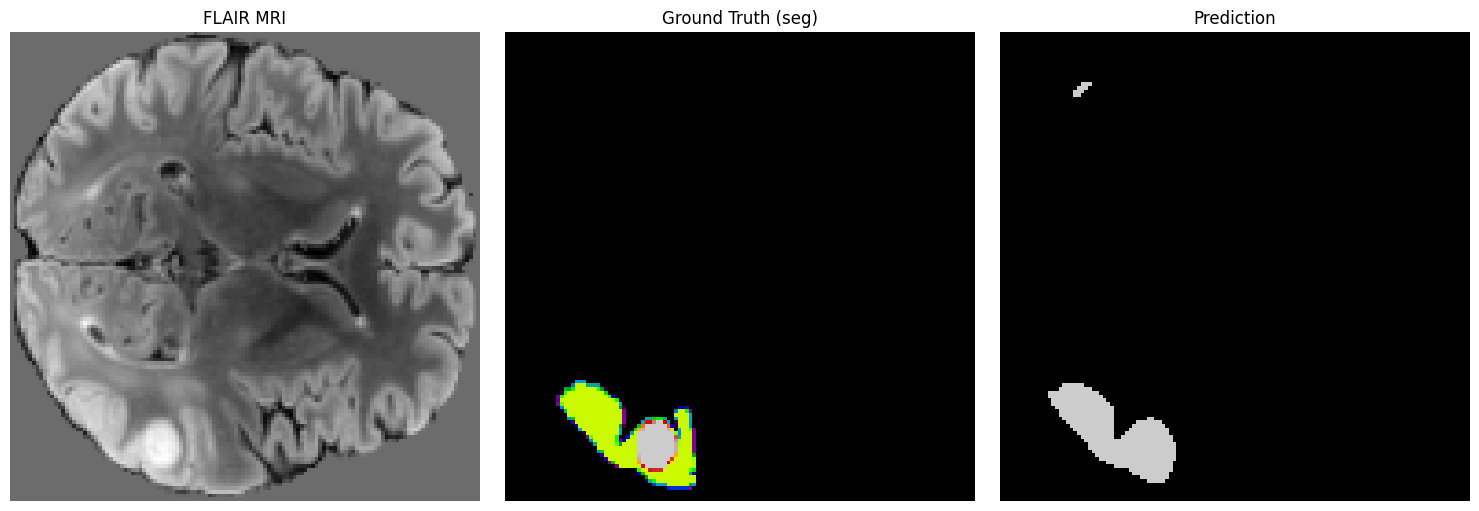

✅ Saved: F:\Projects\ML_Models\BrainTome\results\visuals\BraTS-GLI-00025-000_comparison.png


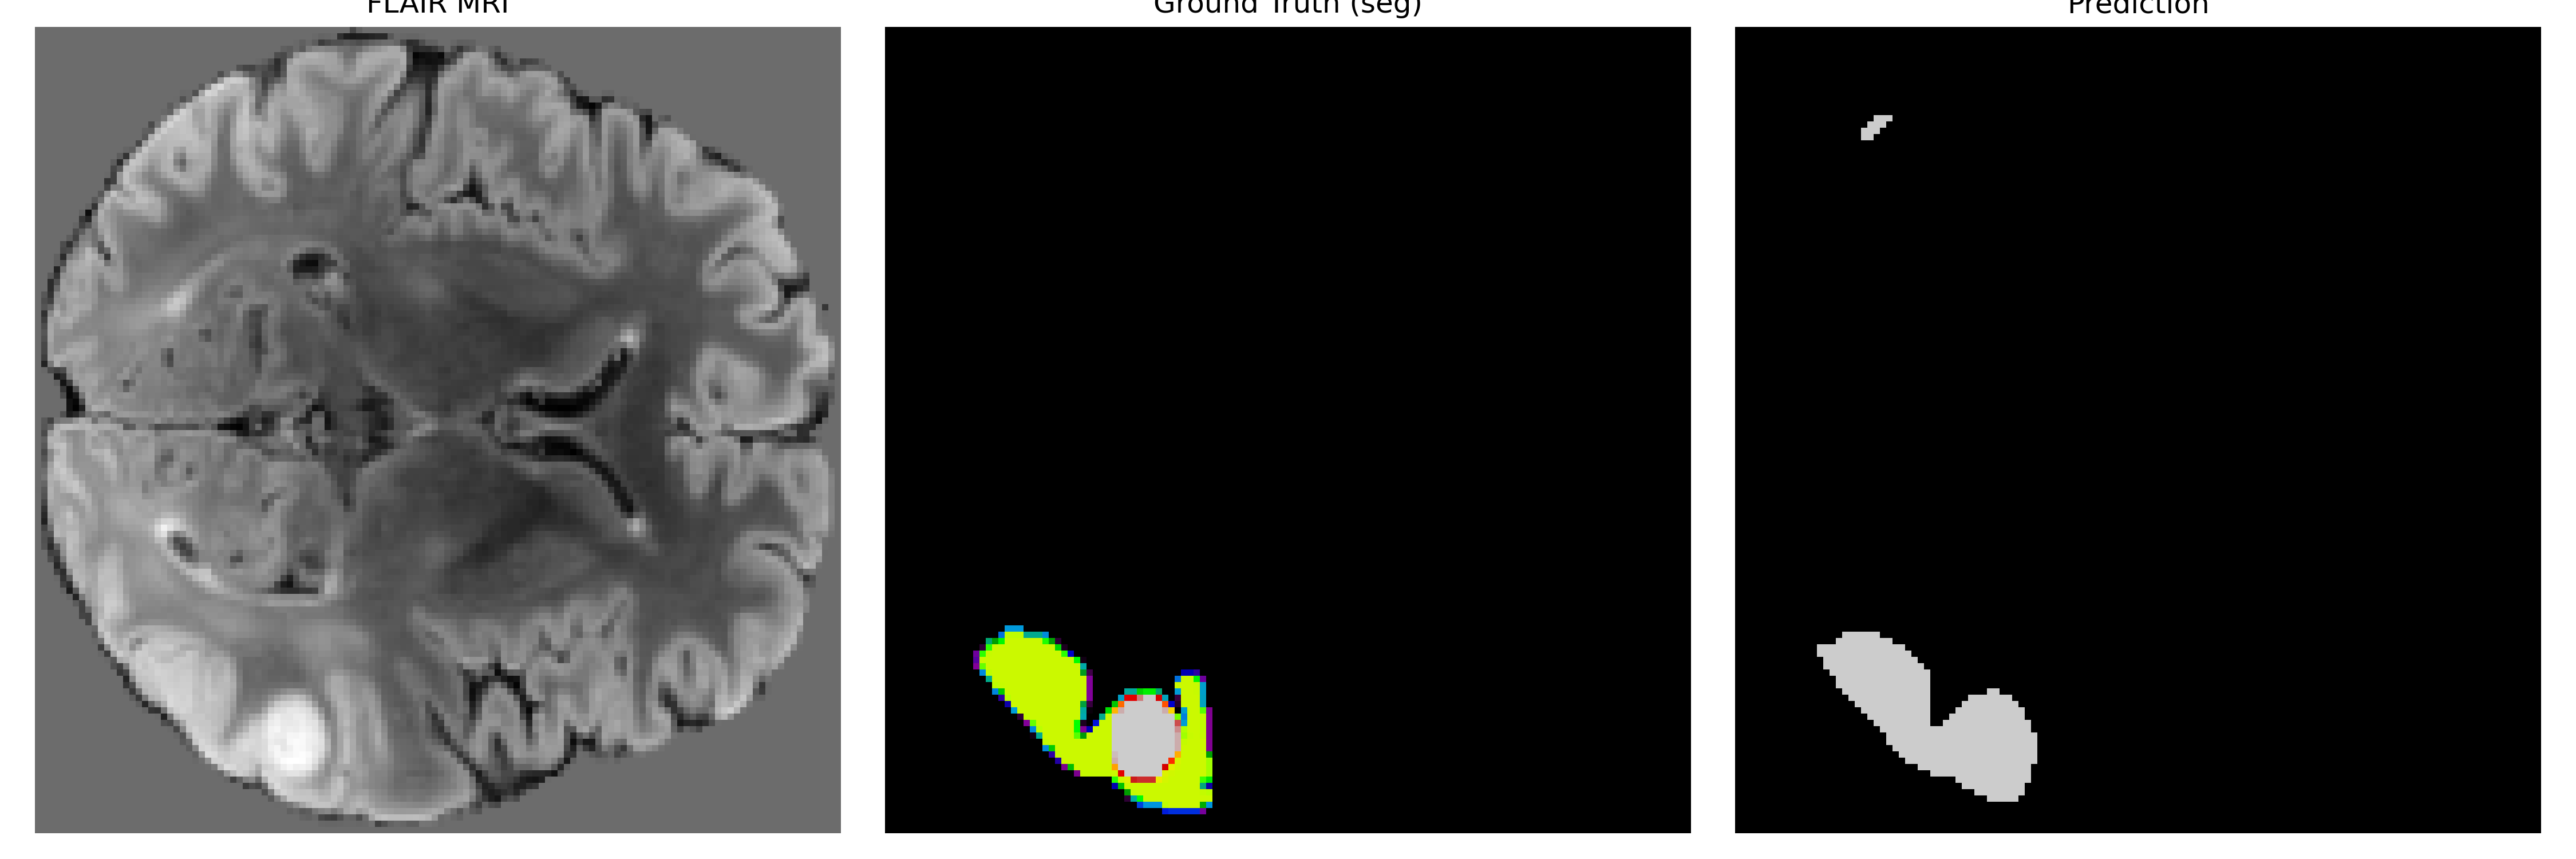

In [2]:
# 📘 BrainTome - Visualize Ground Truth vs Prediction

import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

# 📂 Paths (Update patient ID as needed)
patient_id = "BraTS-GLI-00025-000"
processed_dir = r"F:\Projects\ML_Models\BrainTome\data\processed"
inference_dir = r"F:\Projects\ML_Models\BrainTome\results\inference"
output_image_path = rf"F:\Projects\ML_Models\BrainTome\results\visuals\{patient_id}_comparison.png"

# 🧠 Input paths
flair_path = os.path.join(processed_dir, patient_id, f"{patient_id}-t2f_resized.nii.gz")
t1c_path = os.path.join(processed_dir, patient_id, f"{patient_id}-t1c_resized.nii.gz")  # Optional
gt_path = os.path.join(processed_dir, patient_id, f"{patient_id}-seg_resized.nii.gz")
pred_path = os.path.join(inference_dir, f"{patient_id}_pred.nii.gz")

# ✅ Load volumes
flair = nib.load(flair_path).get_fdata()
gt = nib.load(gt_path).get_fdata()
pred = nib.load(pred_path).get_fdata()

# 🎯 Choose mid slice
mid = flair.shape[2] // 2

# 🖼️ Plot comparison
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(flair[:, :, mid], cmap='gray')
axs[0].set_title("FLAIR MRI")
axs[0].axis("off")

axs[1].imshow(gt[:, :, mid], cmap='nipy_spectral')
axs[1].set_title("Ground Truth (seg)")
axs[1].axis("off")

axs[2].imshow(pred[:, :, mid], cmap='nipy_spectral')
axs[2].set_title("Prediction")
axs[2].axis("off")

plt.tight_layout()

# 💾 Save & Display
os.makedirs(os.path.dirname(output_image_path), exist_ok=True)
plt.savefig(output_image_path, dpi=300)
plt.show()
print(f"✅ Saved: {output_image_path}")
display(Image(filename=output_image_path))
